# The Titanic is A Ship that Sank in the North Atlantic, By using data from the ship's Manifest we can determine who survived based on many parameters.


In [17]:
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv('titanic.csv')

# Display the first few rows of the dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
embarked_names = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}
embarked_full_names = df['Embarked'].map(embarked_names)
print(embarked_full_names)


0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: Embarked, Length: 891, dtype: object


In [19]:
embarkation_survival_rate = df.groupby('Embarked')['Survived'].mean()
print(embarkation_survival_rate)


Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


In [20]:
first_class_passengers_by_embarkation = df[df['Pclass'] == 1].groupby('Embarked')['Pclass'].count()
total_passengers_by_embarkation = df.groupby('Embarked')['Pclass'].count()
percentage_first_class_passengers_by_embarkation = (first_class_passengers_by_embarkation / total_passengers_by_embarkation) * 100
percentage_first_class_passengers_by_embarkation


Embarked
C    50.595238
Q     2.597403
S    19.720497
Name: Pclass, dtype: float64

In [21]:
survived_count = df['Survived'].sum()
print(survived_count)


342


In [22]:
not_survived_count = len(df) - survived_count
print(not_survived_count)


549


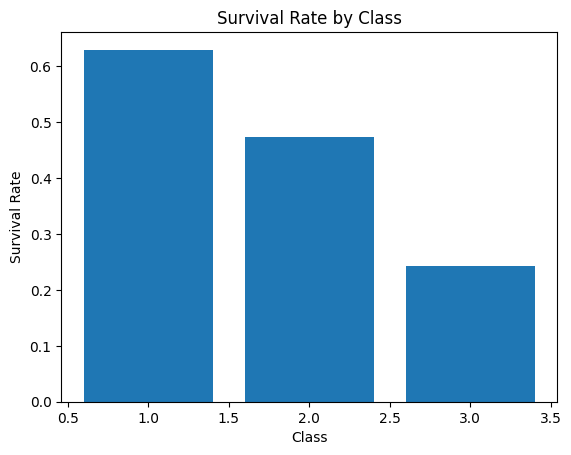

In [23]:
import matplotlib.pyplot as plt


# Group the data by class and calculate the survival rate
class_survival_rate = df.groupby('Pclass')['Survived'].mean()

# Plot the bar chart
plt.bar(class_survival_rate.index, class_survival_rate.values)
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Class')
plt.show()


In [24]:
female_count = len(df[df['Sex'] == 'female'])
print(female_count)


314


In [25]:
female_survived_count = df[(df['Survived'] == 1) & (df['Sex'] == 'female')].shape[0]
print(female_survived_count)


233


In [26]:
print("Percent of women who survived", female_survived_count / female_count)


Percent of women who survived 0.7420382165605095


In [27]:
male_survival_rate = df[df['Sex'] == 'male']['Survived'].mean()
print(male_survival_rate)

0.18890814558058924


In [28]:
women_parch_sibsp_0 = df[(df['Sex'] == 'female') & (df['Parch'] == 0) & (df['SibSp'] == 0)]
women_parch_sibsp_0_survived = women_parch_sibsp_0[women_parch_sibsp_0['Survived'] == 1]
percentage_women_parch_sibsp_0_survived = (len(women_parch_sibsp_0_survived) / len(women_parch_sibsp_0)) * 100
percentage_women_parch_sibsp_0_survived
percentage = (women_traveling_alone / female_count) * 100
print(percentage)

NameError: name 'women_traveling_alone' is not defined

In [ ]:
total_females_no_siblings_or_parents = len(df[(df['Sex'] == 'female') & (df['SibSp'] == 0) & (df['Parch'] == 0)])
print(total_females_no_siblings_or_parents)


126


In [ ]:
total_females_no_siblings_or_parents_survived = len(df[(df['Sex'] == 'female') & (df['SibSp'] == 0) & (df['Parch'] == 0) & (df['Survived'] == 1)])
print(total_females_no_siblings_or_parents_survived)


99


In [ ]:
print(total_females_no_siblings_or_parents_survived/total_females_no_siblings_or_parents)

0.7857142857142857


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier

# Create a classifier with a custom learning rate and increased number of iterations
clf = SGDClassifier(learning_rate='constant', eta0=0.01, max_iter=1000)

# Create a classifier with a custom learning rate
# clf = SGDClassifier(learning_rate='constant', eta0=0.01)

# Select the features and target variable
features = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
target = df['Survived']

# Drop rows with missing values
df = df.dropna()

# Select the features and target variable
features = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
target = df['Survived']

# Continue with the rest of your code...
# Convert categorical variables to numerical using one-hot encoding
features = pd.get_dummies(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the scaled training data to train your model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
# Remember to scale the test data with the same scaler
X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# # Create and train the logistic regression model
# model = LogisticRegression()
# model.fit(X_train, y_train)

# # Make predictions on the test set
# predictions = model.predict(X_test)

# # Calculate the accuracy of the model
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy:", accuracy)


Accuracy: 0.7297297297297297


In [ ]:


# Get the predicted probabilities of survival
probs = model.predict_proba(X_test_scaled)

# Get a DataFrame with the probabilities of survival and the actual outcomes
probs_df = pd.DataFrame({
    'Survival Probability': probs[:, 1],
    'Actual Outcome': y_test
})

# Reset the index of the DataFrame
probs_df = probs_df.reset_index()

# Merge the probabilities with the original data
merged_df = pd.merge(df, probs_df, left_index=True, right_on='index')

# Filter for passengers who had a high chance of survival but didn't survive
high_chance_didnt_survive = merged_df[(merged_df['Survival Probability'] > 0.7) & (merged_df['Actual Outcome'] == 0)]

# Print the passengers
print(high_chance_didnt_survive)


    PassengerId  Survived  Pclass                                        Name  \
0           119         0       1                    Baxter, Mr. Quigg Edmond   
6           140         0       1                          Giglio, Mr. Victor   
35          178         0       1                  Isham, Miss. Ann Elizabeth   
1           252         0       3  Strom, Mrs. Wilhelm (Elna Matilda Persson)   

       Sex   Age  SibSp  Parch    Ticket      Fare    Cabin Embarked  index  \
0     male  24.0      0      1  PC 17558  247.5208  B58 B60        C    118   
6     male  24.0      0      0  PC 17593   79.2000      B86        C    139   
35  female  50.0      0      0  PC 17595   28.7125      C49        C    177   
1   female  29.0      1      1    347054   10.4625       G6        S    251   

    Survival Probability  Actual Outcome  
0               0.710611               0  
6               0.743654               0  
35              0.961423               0  
1               0.817438  

In [ ]:
# Filter for passengers who had a low chance of survival but did survive
low_chance_survived = merged_df[(merged_df['Survival Probability'] < 0.3) & (merged_df['Actual Outcome'] == 1)]

# Print the passengers
print(low_chance_survived)

    PassengerId  Survived  Pclass                                Name   Sex  \
18          430         1       3  Pickard, Mr. Berk (Berk Trembisky)  male   

     Age  SibSp  Parch             Ticket  Fare Cabin Embarked  index  \
18  32.0      0      0  SOTON/O.Q. 392078  8.05   E10        S    429   

    Survival Probability  Actual Outcome  
18              0.223641               1  


In [30]:
# Select all numerical columns in the DataFrame
X = df.select_dtypes(include=[np.number])

# Remove rows with NaN values from X
X = X.dropna()

# Create a KMeans instance with 6 clusters
kmeans = KMeans(n_clusters=6)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster assignments
clusters = kmeans.predict(X)

# Add the cluster assignments to the DataFrame X
X['Cluster'] = clusters

# Print the DataFrame with the cluster assignments
print(X)

     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Cluster
0              1         0       3  22.0      1      0   7.2500        3
1              2         1       1  38.0      1      0  71.2833        3
2              3         1       3  26.0      0      0   7.9250        3
3              4         1       1  35.0      1      0  53.1000        3
4              5         0       3  35.0      0      0   8.0500        3
..           ...       ...     ...   ...    ...    ...      ...      ...
885          886         0       3  39.0      0      5  29.1250        0
886          887         0       2  27.0      0      0  13.0000        0
887          888         1       1  19.0      0      0  30.0000        0
889          890         1       1  26.0      0      0  30.0000        0
890          891         0       3  32.0      0      0   7.7500        0

[714 rows x 8 columns]


C:\Users\jeffh\AppData\Local\Temp\ipykernel_1552\2028561821.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = le.fit_transform(X['Sex'])


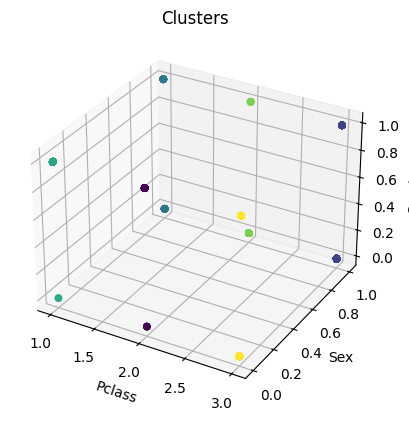

In [34]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Select 'Sex', 'Pclass', and 'Survived' columns
X = df[['Sex', 'Pclass', 'Survived']]

# Convert 'Sex' to numerical form
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])

# Remove rows with NaN values from X
X = X.dropna()

# Create a KMeans instance with 6 clusters
kmeans = KMeans(n_clusters=6)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster assignments
clusters = kmeans.predict(X)

# Add the cluster assignments to the DataFrame X
X['Cluster'] = clusters

# Plot the clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['Pclass'], X['Sex'], X['Survived'], c=X['Cluster'])
ax.set_xlabel('Pclass')
ax.set_ylabel('Sex')
ax.set_zlabel('Survived')
plt.title('Clusters')
plt.show()

C:\Users\jeffh\AppData\Local\Temp\ipykernel_1552\2672470102.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = le.fit_transform(X['Sex'])


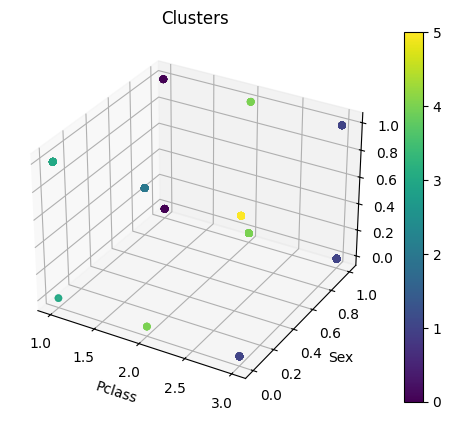

In [35]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# Select 'Sex', 'Pclass', and 'Survived' columns
X = df[['Sex', 'Pclass', 'Survived']]

# Convert 'Sex' to numerical form
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])

# Remove rows with NaN values from X
X = X.dropna()

# Create a KMeans instance with 6 clusters
kmeans = KMeans(n_clusters=6)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster assignments
clusters = kmeans.predict(X)

# Add the cluster assignments to the DataFrame X
X['Cluster'] = clusters

# Plot the clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X['Pclass'], X['Sex'], X['Survived'], c=X['Cluster'], cmap='viridis')

# Add a colorbar
plt.colorbar(sc)

ax.set_xlabel('Pclass')
ax.set_ylabel('Sex')
ax.set_zlabel('Survived')
plt.title('Clusters')
plt.show()

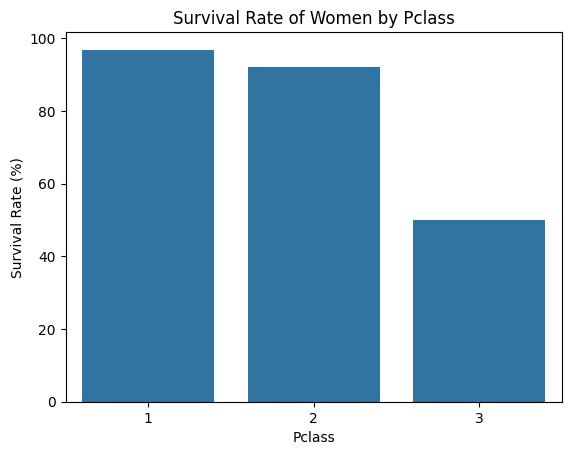

In [36]:
import seaborn as sns

# Filter the DataFrame to include only women
women = df[df['Sex'] == 'female']

# Calculate the survival rate by 'Pclass'
survival_rate = women.groupby('Pclass')['Survived'].mean()

# Convert the survival rate to percentage
survival_rate = survival_rate * 100

# Create a bar plot of the survival rate by 'Pclass'
sns.barplot(x=survival_rate.index, y=survival_rate.values)

# Set the labels and title of the plot
plt.xlabel('Pclass')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate of Women by Pclass')
plt.show()

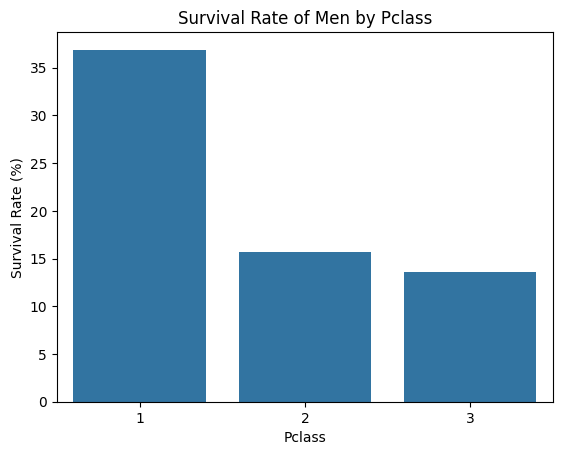

In [37]:
# Filter the DataFrame to include only men
men = df[df['Sex'] == 'male']

# Calculate the survival rate by 'Pclass'
survival_rate = men.groupby('Pclass')['Survived'].mean()

# Convert the survival rate to percentage
survival_rate = survival_rate * 100

# Create a bar plot of the survival rate by 'Pclass'
sns.barplot(x=survival_rate.index, y=survival_rate.values)

# Set the labels and title of the plot
plt.xlabel('Pclass')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate of Men by Pclass')
plt.show()